Machine Learning from

### Table of Contents
- [Importing Basic Libraries](#Imports)
- [Data Collection](#Read)
- [Formate](#Formate)
- [Feature Engineering](#Feature)
- [Drop ot needed columns](#Drop)


<a id='Imports'></a>
### Importing Basic Libraries

In [348]:

import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
import warnings
warnings.filterwarnings("ignore")

<a id='Read'></a>
### Data Collection

In [91]:
data= pd.read_csv("TrainSE.csv")
df= data.copy()

In [92]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [93]:
#Checking dataset info by feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [94]:
df.shape
#We have 8068 total rows and 11 columns

(8068, 11)

In [52]:
#df.dropna(axis=0, how='any', thresh=None, subset=None , inplace=True)

In [95]:
#Missing values?
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [96]:
#Checking the existence of duplicated rows
df.duplicated().sum()

0

In [118]:
df["Work_Experience"].fillna(0,inplace=True)
df["Ever_Married"].fillna("No", inplace=True)
df["Graduated"].fillna("No", inplace=True)
df.dropna(subset=["Profession"], inplace=True)
df.dropna(subset=["Var_1"], inplace=True)
df["Family_Size"].fillna(df["Family_Size"].mean(), inplace=True)
df.drop(["ID"],axis= 1, inplace=True)

In [119]:
#check
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [120]:
df.shape

(7871, 10)

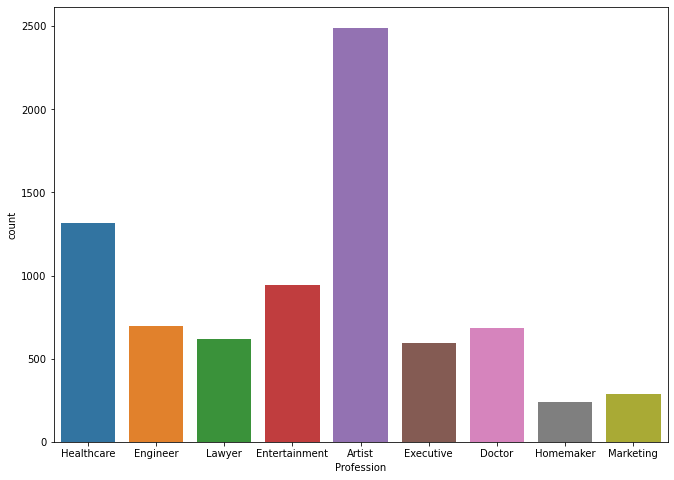

In [121]:
plt.figure(figsize=(11,8))
sns.countplot(df.Profession);

In [122]:
plt.figure(figsize=(7,8))
px.pie(df['Spending_Score'].value_counts().reset_index(),values= 'Spending_Score', names = ['Low ', 'Average','High'] , hole =0.6)

<Figure size 504x576 with 0 Axes>

Median value of Family size feature is: 2.8516265538217405


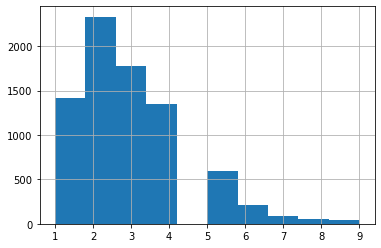

In [123]:
df['Family_Size'].hist()
print("Median value of Family size feature is:",df['Family_Size'].median())

In [124]:
# Visualize Target Label Distribution
plot_data = data.groupby('Segmentation')['Segmentation'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['Segmentation'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer<br>Segmentation', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [125]:
df['Segmentation'].value_counts()

D    2196
C    1932
A    1920
B    1823
Name: Segmentation, dtype: int64

In [372]:
#Checking data balancing (for classification)
auto_balancing = pd.DataFrame()
auto_balancing["Count"] = df["Segmentation"].value_counts()
#auto_balancing["Count%"] = df["Segmentation"].value_counts()/df.shape[0]*100
auto_balancing

,Count
D,2196
C,1932
A,1920
B,1823


<AxesSubplot:>

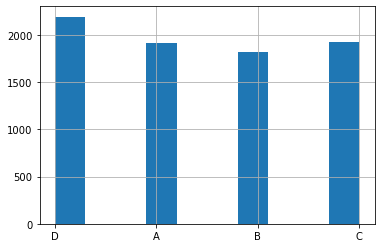

In [375]:
df["Segmentation"].hist()

(array([], dtype=float64), [])

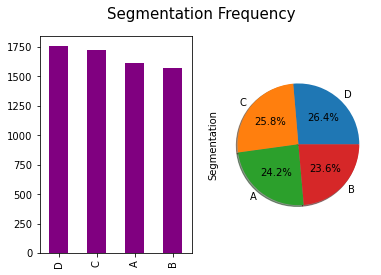

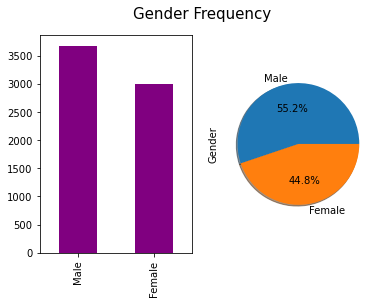

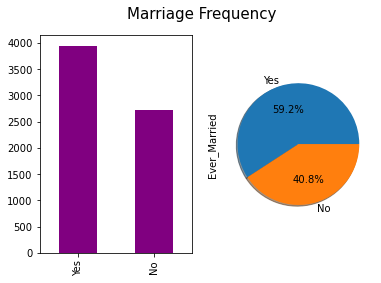

In [76]:

#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
df["Segmentation"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Segmentation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Gender"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Gender Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Ever_Married"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Ever_Married"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Marriage Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)


(array([], dtype=float64), [])

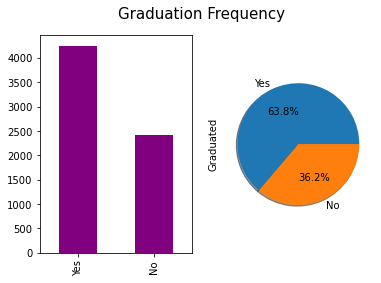

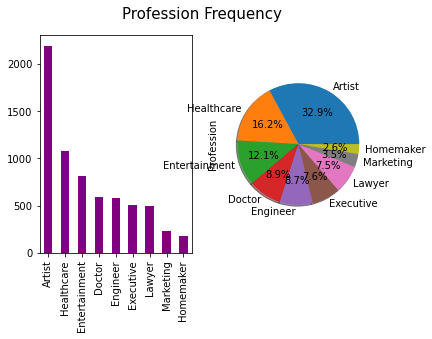

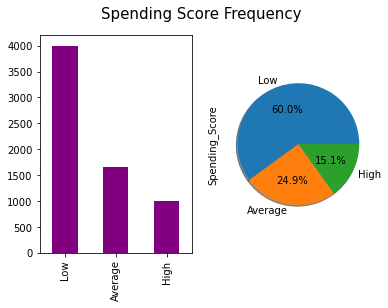

In [77]:
#Plotting Categorical Variables
fig, ax = plt.subplots(1, 2)
df["Graduated"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Graduated"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Graduation Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Profession"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Profession"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Profession Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["Spending_Score"].value_counts().plot.bar(color="purple", ax=ax[0])
df["Spending_Score"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Spending Score Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

<AxesSubplot:xlabel='Age'>

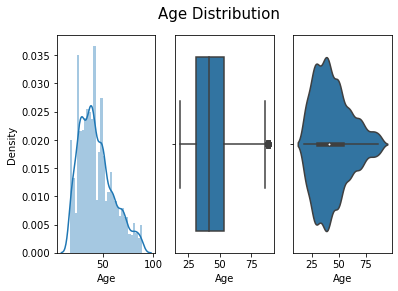

In [78]:
#Plotting Numerical Variables

fig, ax = plt.subplots(1,3)
fig.suptitle("Age Distribution", fontsize=15)
sns.distplot(df["Age"], ax=ax[0])
sns.boxplot(df["Age"], ax=ax[1])
sns.violinplot(df["Age"], ax=ax[2])

In [134]:
# Customer Type Based On Gender
gender_based = pd.pivot_table(df,index=['Gender'],columns=['Segmentation'],aggfunc=np.count_nonzero)
gender_based

Age                  Ever_Married                  Family_Size  \
Segmentation     A    B     C     D            A    B     C     D           A   
Gender                                                                          
Female         883  843   900   927          883  843   900   927         883   
Male          1037  980  1032  1269         1037  980  1032  1269        1037   

                   ... Spending_Score       Var_1                   \
Segmentation    B  ...              C     D     A    B     C     D   
Gender             ...                                               
Female        843  ...            900   927   883  843   900   927   
Male          980  ...           1032  1269  1037  980  1032  1269   

             Work_Experience                 
Segmentation               A    B    C    D  
Gender                                       
Female                   560  521  542  572  
Male                     649  571  632  769  

[2 rows x 32 columns]

In [135]:
#Defining X and y
X = df.drop("Segmentation",axis="columns")
y = df['Segmentation']

In [136]:
#Build our feature list for cat. and numeric 
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns

print("Numirical coloums is :", num_list)
print("Catigorical coloums is :",cat_list)

Numirical coloums is : Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object')
Catigorical coloums is : Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')


## BaseLine Model with numerical cols (Expr0)

In [137]:
X=pd.get_dummies(X,drop_first=True)
X

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38,0.0,3.0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,67,0.0,2.0,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,0.0,6.0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8064,35,3.0,4.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
8065,33,1.0,1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,27,1.0,4.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [1]:
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_predl = mdl_local.predict(X_local)
    print(f'Test  : {mdl_local.score(X_local, y_local)}')
    print(f"F({bta}):", fbeta_score(y_local, y_predl, beta= bta ,average='weighted'))
    print("Precision :", precision_score(y_local, y_predl,average='weighted'))
    print("Recall :", recall_score(y_local, y_predl,average='weighted'))
    

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# BaseLine Model 

In [326]:
#BaseLine Model with numerical cols (Expr0)

baseline=LogisticRegression()
baseline.fit(X_train[num_list],y_train)
print(f'Train : {baseline.score(X_train[num_list],y_train)}')
model_eval(baseline,X_test[num_list],y_test, bta = 1)

Train : 0.41232528589580686
Test  : 0.4095238095238095
F(1): 0.36465410825758277
Precision : 0.36171927135460213
Recall : 0.4095238095238095


# scaling 

In [328]:

# Expr2: with scaling (standard scaler)
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


std_ml = LogisticRegression()
std_ml.fit(X_train_std, y_train)
print(f'Train : {std_ml.score(X_train_std, y_train)}')
model_eval(std_ml, X_test_std, y_test, bta = 1)

Train : 0.5230304955527318
Test  : 0.5168253968253969
F(1): 0.5041705900266502
Precision : 0.5001532440023216
Recall : 0.5168253968253969


In [329]:
# Expr2: with scaling (minmax scaler)
std_mm = MinMaxScaler()

X_train_mm = std_mm.fit_transform(X_train)
X_test_mm = std_mm.transform(X_test)


std_mm_ml = LogisticRegression()
std_mm_ml.fit(X_train_mm, y_train)
print(f'Train : {std_mm_ml.score(X_train_mm, y_train)}')
model_eval(std_mm_ml, X_test_mm, y_test, bta = 1)

Train : 0.5236658195679796
Test  : 0.5161904761904762
F(1): 0.5036813816619478
Precision : 0.5001054354550725
Recall : 0.5161904761904762


In [330]:
# Expr3: with grid search
lr_ml = LogisticRegression()
prams ={'penalty': [ 'l1', 'l2'],'C': [2,3,4,5 ]}
gs_cv1= GridSearchCV(lr_ml , param_grid=prams, n_jobs=-1 ,cv=10)
gs_cv1.fit(X_train_std,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [2, 3, 4, 5], 'penalty': ['l1', 'l2']})

In [332]:
tuned_lr = gs_cv1.best_estimator_
print(f'Train : {tuned_lr.score(X_train_std, y_train)}')
model_eval(tuned_lr,X_test_std,y_test,bta = 1)

Train : 0.52287166454892
Test  : 0.5168253968253969
F(1): 0.504308174807603
Precision : 0.5003532718043044
Recall : 0.5168253968253969


In [ ]:
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))

In [280]:

#tuned_lr111= gs_cv1.best_estimator_
#y_predl = tuned_lr111.predict(X_test_std)
#print(f'Train : {tuned_lr111.score(X_train_std, y_test)}')
#print(f'Test  : {tuned_lr111.score(X_test_std, y_test)}')
#print(f"F({bta}):", fbeta_score(y_test, y_predl, beta= bta))
#print("Precision :", precision_score(y_test, y_predl))
#"print("Recall :", recall_score(y_test, y_predl))

# Tree model

In [333]:
from sklearn import tree

best_dt =DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split= 2)
best_dt.fit(X_train_std, y_train)
print (best_dt.score(X_train_std, y_train))
print (best_dt.score(X_test_std, y_test))

0.4849110546378653
0.49396825396825395


In [334]:
tree_model = DecisionTreeClassifier()
prams ={ 'max_depth'  : [3 ,5, 7,8, 11, 12],
       'min_samples_split' : [2, 3, 5, 9] , 'criterion' : ['gini', 'entropy'] }
gd_cv2= GridSearchCV(tree_model , param_grid=prams, n_jobs=-1 ,cv=10)
gd_cv2.fit(X_train_std , y_train) 
tunn_tree =gd_cv2.best_estimator_

In [335]:
print(f'Train : {tunn_tree.score(X_train_std, y_train)}')
model_eval(tunn_tree,X_test_std,y_test)

Train : 0.5513024142312579
Test  : 0.5104761904761905
F(1): 0.5097664692776677
Precision : 0.5133347327510548
Recall : 0.5104761904761905


[Text(418.5, 453.0, 'Age <= 34.0\ngini = 0.749\nsamples = 6665\nvalue = [1616, 1572, 1720, 1757]\nclass = C'),
 Text(209.25, 271.8, 'Age <= 24.0\ngini = 0.608\nsamples = 2175\nvalue = [451, 233, 252, 1239]\nclass = C'),
 Text(104.625, 90.59999999999997, 'gini = 0.216\nsamples = 615\nvalue = [21, 23, 28, 543]\nclass = C'),
 Text(313.875, 90.59999999999997, 'gini = 0.686\nsamples = 1560\nvalue = [430, 210, 224, 696]\nclass = C'),
 Text(627.75, 271.8, 'Spending_Score_High <= 0.5\ngini = 0.724\nsamples = 4490\nvalue = [1165, 1339, 1468, 518]\nclass = B'),
 Text(523.125, 90.59999999999997, 'gini = 0.649\nsamples = 2426\nvalue = [389, 768, 1143, 126]\nclass = B'),
 Text(732.375, 90.59999999999997, 'gini = 0.721\nsamples = 2064\nvalue = [776, 571, 325, 392]\nclass = A')]

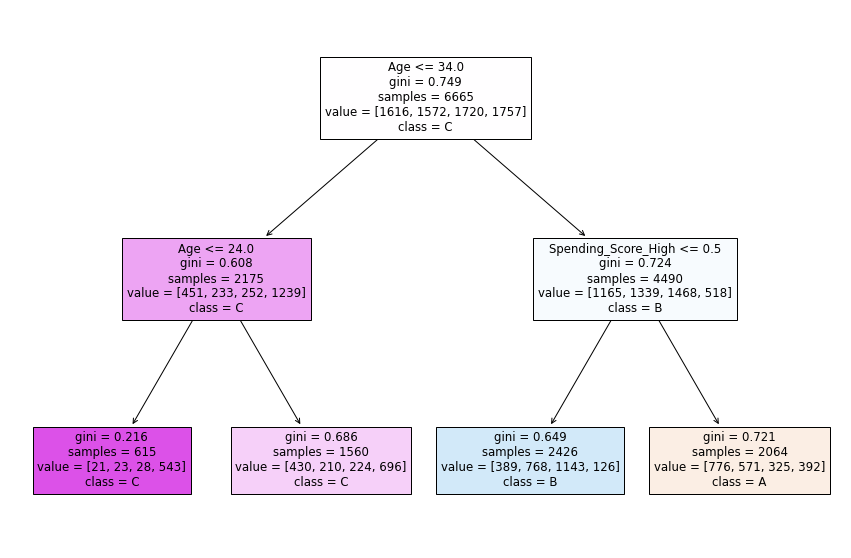

In [336]:
plt.figure(figsize=(15,10))
names = ['A', 'D', 'B', 'C']
tree.plot_tree(tree_model2,feature_names = X_train.columns,class_names=names,filled = True)

## Random Forest Classifier

In [337]:
rf_model = RandomForestClassifier()
prams ={ 'n_estimators':[10 ,20,40,50, 70], 'max_depth'  : [3 ,5, 7,8, 11, 12],
       'min_samples_split' : [2, 3, 5, 9] , 'criterion' : ['gini', 'entropy'], 'max_features':['auto','sqrt','log2'] }
gd_rf= GridSearchCV(rf_model , param_grid=prams, n_jobs=-1 ,cv=10)
gd_rf.fit(X_train_std , y_train) 
gd_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=9, n_estimators=40)

In [338]:
tuned_rf= gd_rf.best_estimator_

In [339]:
print(f'Train : {tuned_rf.score(X_train_std, y_train)}')
model_eval(tuned_rf,X_test_std,y_test)

Train : 0.6372299872935197
Test  : 0.5358730158730158
F(1): 0.5256143625569498
Precision : 0.5216278168536518
Recall : 0.5358730158730158


## KNeighbors Classifier

In [363]:
knn_model = KNeighborsClassifier()
prams ={ 'n_neighbors':[3, 7, 9, 11]}
gd_knn= GridSearchCV(knn_model , param_grid=prams, n_jobs=-1 ,cv=10)
gd_knn.fit(X_train , y_train) 
gd_knn.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [364]:
tuned_knn = gd_knn.best_estimator_

In [365]:
print(f'Train : {tuned_knn.score(X_train_std, y_train)}')
model_eval(tuned_knn,X_test_std,y_test)

Train : 0.27620711562897077
Test  : 0.29015873015873017
F(1): 0.1305143107111611
Precision : 0.08419208868732679
Recall : 0.29015873015873017


In [ ]:
#######################

In [366]:
def make_confusion_matrix(model, threshold=0.3):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [381]:
seg=y_train.unique()
seg

array(['C', 'D', 'A', 'B'], dtype=object)

In [379]:
# precision recall curve
y_score=tuned_lr.predict_proba(X_test_std)
seg=y_train.unique()
precision = dict()
recall = dict()
for i in range(seg):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [376]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, 
                                                tuned_lr.predict_proba(X_test_std)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves'); 

ValueError: multiclass format is not supported

In [370]:
interactive(lambda threshold: make_class_report(best_model,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [353]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(tuned_lr,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [44]:
#Plotting a Feature Importance
from sklearn.ensemble import RandomForestClassifier
#Defining the model
model = RandomForestClassifier().fit(X, y)
#Getting importance
importance = model.feature_importances_
#Summarizing feature importance
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v))

Feature:ID, Score:0.2998
Feature:Age, Score:0.2736
Feature:Family_Size, Score:0.0930
Feature:Gender_Male, Score:0.0309
Feature:Ever_Married_Yes, Score:0.0296
Feature:Graduated_Yes, Score:0.0370
Feature:Profession_Doctor, Score:0.0160
Feature:Profession_Engineer, Score:0.0145
Feature:Profession_Entertainment, Score:0.0194
Feature:Profession_Executive, Score:0.0105
Feature:Profession_Healthcare, Score:0.0363
Feature:Profession_Homemaker, Score:0.0089
Feature:Profession_Lawyer, Score:0.0084
Feature:Profession_Marketing, Score:0.0111
Feature:Spending_Score_High, Score:0.0111
Feature:Spending_Score_Low, Score:0.0386
Feature:Var_1_Cat_2, Score:0.0090
Feature:Var_1_Cat_3, Score:0.0113
Feature:Var_1_Cat_4, Score:0.0137
Feature:Var_1_Cat_5, Score:0.0037
Feature:Var_1_Cat_6, Score:0.0172
Feature:Var_1_Cat_7, Score:0.0064


<AxesSubplot:>

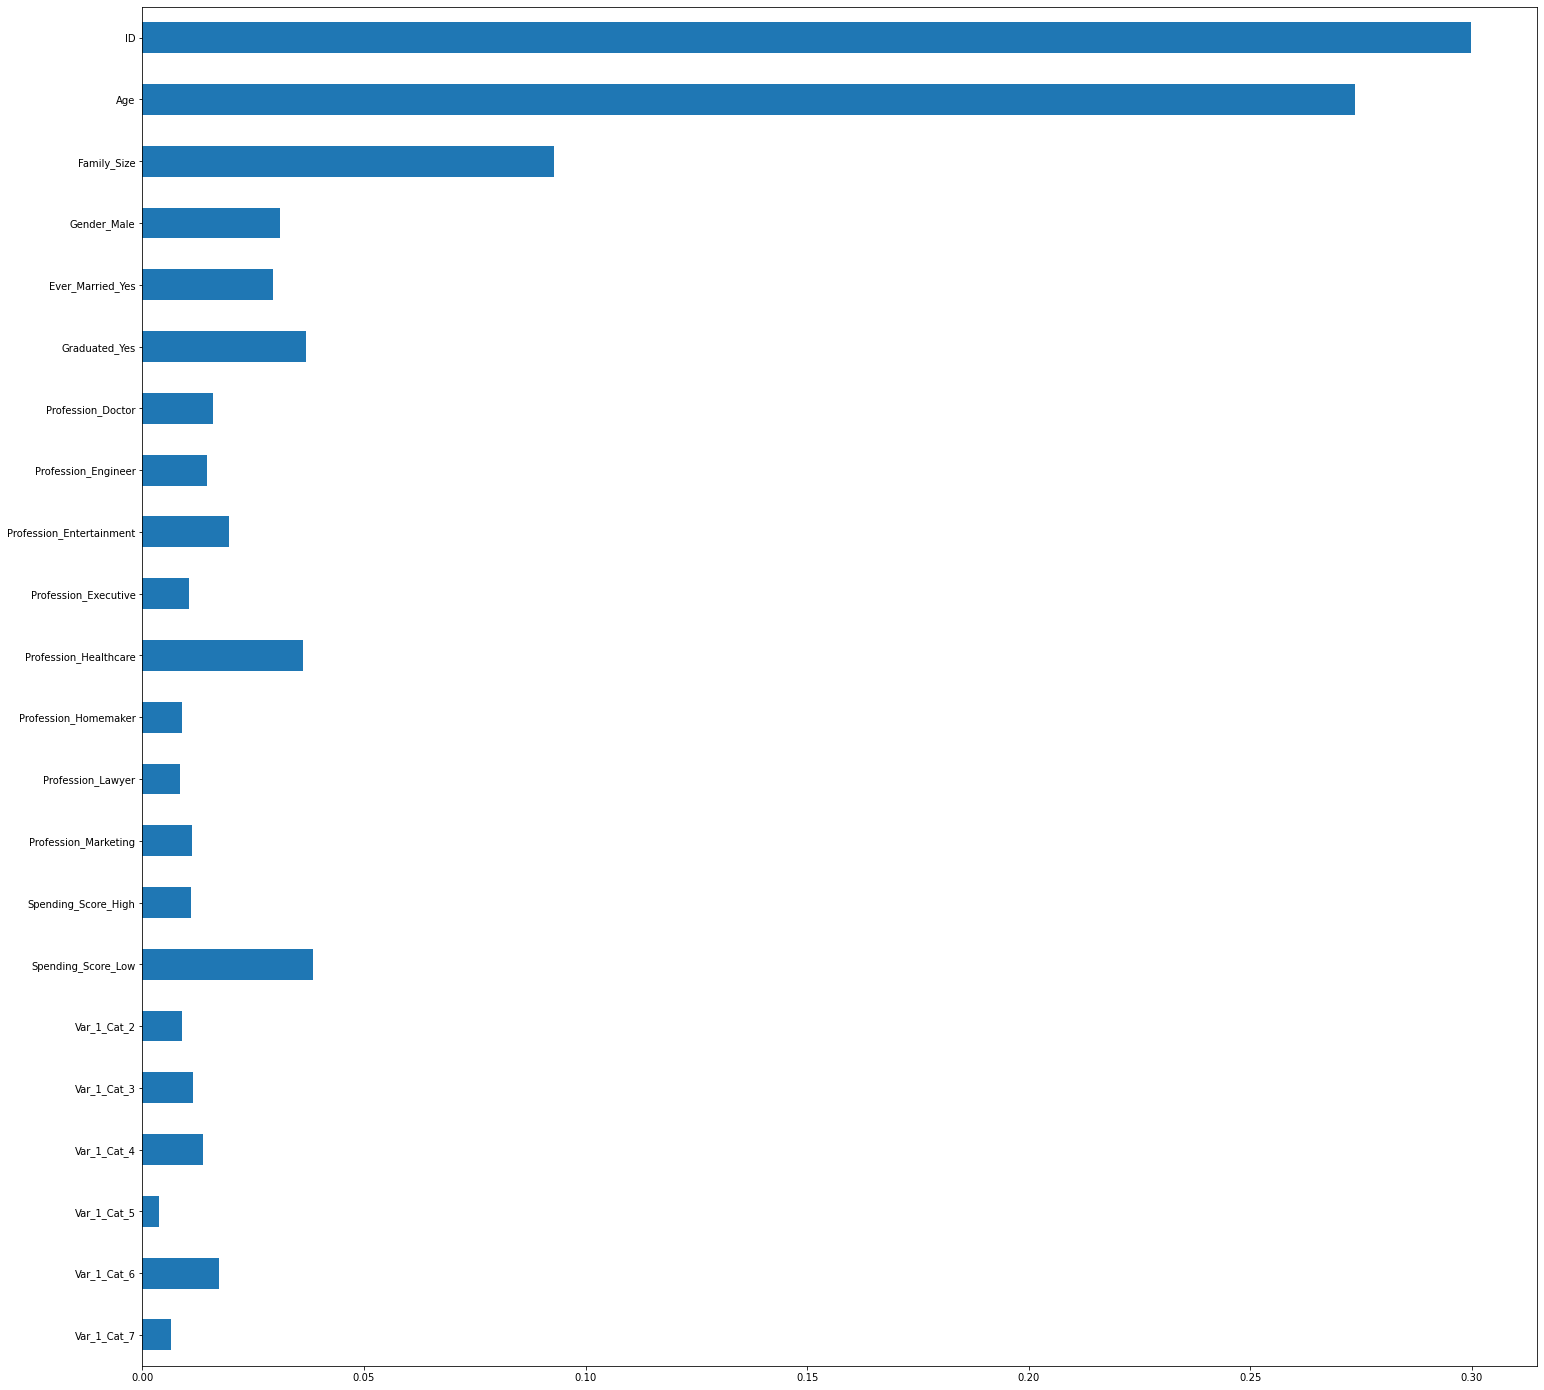

In [45]:
#Plotting feature importance
pd.Series(model.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(25,25))

Summary of data modeling¶
It can be found that all the performance are generally bad. By listing out the feature importance on catboost (or any other), we can see (1) Working_Experience (2) Profession (3) Graduated and (4) Ever_Married have contributed a significant part of the model. However, we do have a large proportion of data is filled by ourselves. Refer to the accuracy list above, CatBoost seems to be the best approach. However, would suggest to have a better sampling again for better data modeling.